In [2]:
using LinearAlgebra
using Plots

In [3]:
n=3
E,=qr(randn(n,n))
E1=E[:,1:2]
E2=E[:,3:end]
F,=qr(randn(n,n))
F1=F[:,1:2]
F2=F[:,3:end]

3×1 Matrix{Float64}:
 -0.9607093289919575
  0.17194478850979322
  0.2178820205802794

In [4]:
function plot_matrix_as_plane(A; grid_size=10)
    # Extrair os dois vetores coluna da matriz
    v1 = A[:, 1]
    v2 = A[:, 2]

    # Gerar uma grade de pontos no plano
    u = range(-1, 1, length=grid_size)
    v = range(-1, 1, length=grid_size)
    X = [v1[1] * ui + v2[1] * vi for ui in u, vi in v]
    Y = [v1[2] * ui + v2[2] * vi for ui in u, vi in v]
    Z = [v1[3] * ui + v2[3] * vi for ui in u, vi in v]

    # Definir os ticks manualmente
    xticks = range(minimum(X), maximum(X), length=5)  # 5 ticks no eixo x
    yticks = range(minimum(Y), maximum(Y), length=5)  # 5 ticks no eixo y
    zticks = range(minimum(Z), maximum(Z), length=5)  # 5 ticks no eixo z

    # Plotar a superfície
    surface(X, Y, Z, color=:blue, alpha=0.5, legend=false,
            xticks=xticks, yticks=yticks, zticks=zticks)
    xlabel!("X")
    ylabel!("Y")
    zlabel!("Z")
    title!("Plano definido pela matriz 3x2")
end

plot_matrix_as_plane (generic function with 1 method)

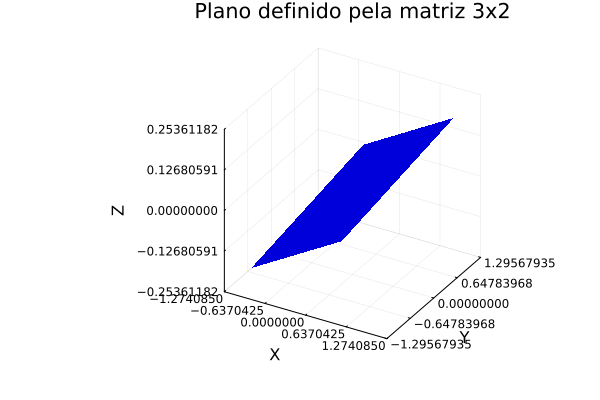

In [5]:
plot_matrix_as_plane(E1)

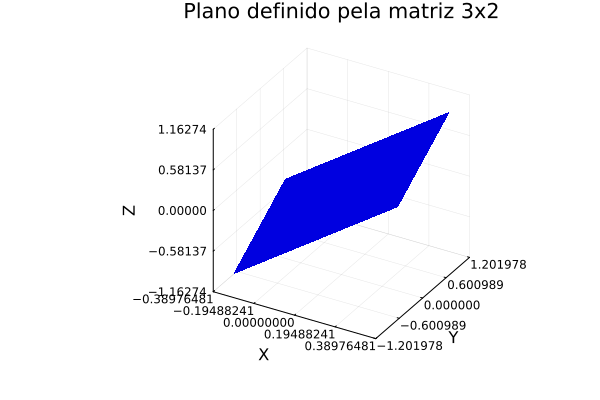

In [6]:
plot_matrix_as_plane(F1)

In [7]:
U1,S11,V1=svd(E1'*F1,full=true)
temp,S12,V2=svd(E1'*F2,full=true)
U2,S22,V2=svd(E2'*F2,full=true)
D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
 U2'*E2'*F1*V1 U2'*E2'*F2*V2]
U=[U1 zeros(2,n-2)
 zeros(n-2,2) U2]
W=E*U*D*U'*E'

3×3 Matrix{Float64}:
 0.387793   0.214914  -0.896342
 0.02995    0.968987   0.24529
 0.92126   -0.121967   0.36933

In [8]:
D

3×3 Matrix{Float64}:
  1.0           6.93889e-17  -1.64394e-16
  9.02056e-17   0.363055      0.931768
 -4.32086e-17  -0.931768      0.363055

In [9]:
norm(E*U*D*U'*E'*E1-F1)

2.0505146429323675

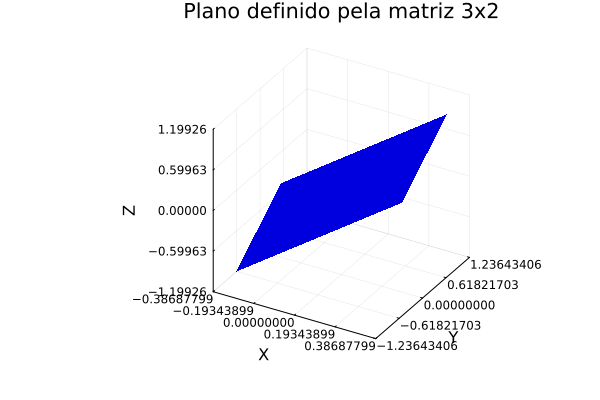

In [10]:
plot_matrix_as_plane(W*E1)

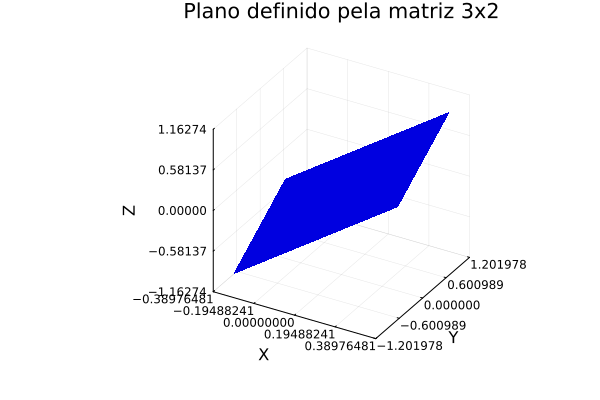

In [11]:
plot_matrix_as_plane(F1)

In [12]:
norm(W*E1*U1-F1)

1.9999999999999991

In [13]:
norm(W*E1*U1*V1'-F1)

8.554842949272357e-16

In [14]:
norm(D'*D-(1* Matrix(I, n, n)))

7.42991767924481e-16

In [15]:
norm(W'*W-(1* Matrix(I, n, n)))

1.6262493657593083e-15

In [16]:
rotated=W*E1*U1
norm(rotated-F1*V1)

1.1561121837454796e-15

In [17]:
function draw(M)
    x=M[:,1]
    y=M[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2]+e[3]),"\n")
    #print(norm(e[1])+norm(e[2])+norm(e[3]))
    E=[real(e)' ; imag(e)']
    points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]]
    return points
end

draw (generic function with 1 method)

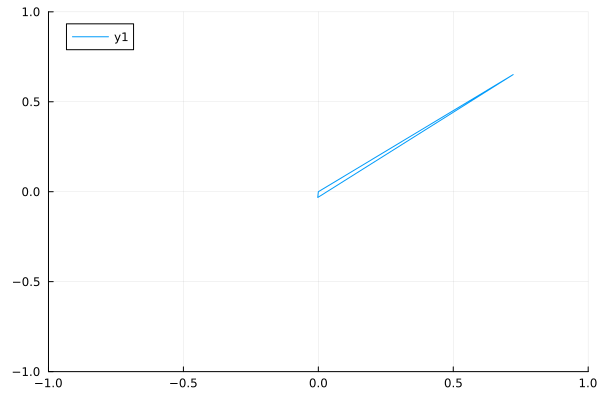

In [18]:
points=draw(E1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

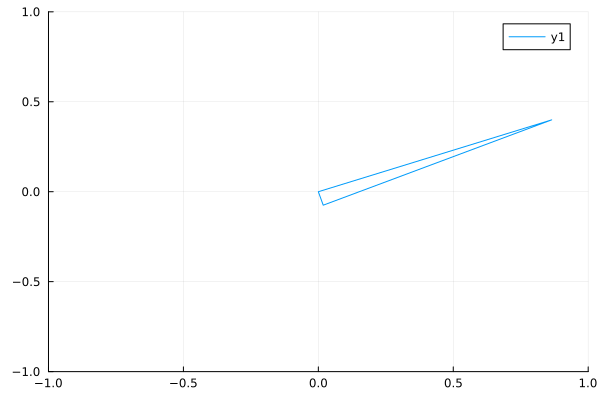

In [19]:
points=draw(F1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

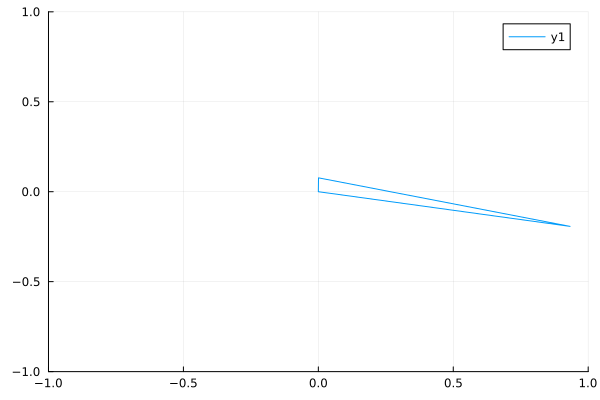

In [20]:
points=draw(W*E1*U1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])